In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN



plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("pastel")

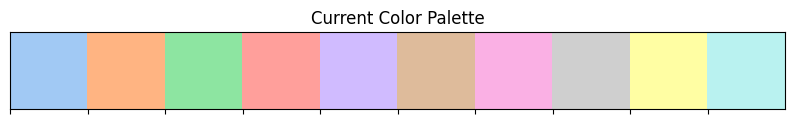

In [ ]:
# Get the current color palette
current_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the colors in the palette
sns.palplot(current_palette)
plt.title("Current Color Palette")
plt.show()

# Read Data

In [ ]:
data = pd.read_csv('/content/transformed_datatset_22_variables.csv')
data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,...,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Age Group,Purchase_Date_Month_Year,Purchase_Frequence_per_year,Product Range
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40.0,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,...,2.0,2.0,Low,1,2010,Winter,Adult,2022-04,2022,Average
1,NaN,25.0,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,...,2.0,1.0,Low,8,1989,Fall,Young Adult,2021-08,2021,Expensive
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57.0,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,...,9.0,1.0,Low,6,1995,Winter,Adult,2021-12,2021,Average
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38.0,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,...,3.0,4.0,Low,9,2012,Fall,Adult,2022-12,2022,Average
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68.0,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,...,7.0,2.0,High,1,2010,Summer,Senior,2020-06,2020,Expensive


# Delete Non Contextual Variables

when applying clustering, we typically drop non-numeric columns such as customer ID, Transaction ID, Product ID and address. These columns are not suitable for clustering because clustering algorithm relies on numerical distances between data points. Categorical variables, like customer ID and address, don't have meaningful distances in a numerical sense.

In [ ]:
non_numeric_columns = ['Customer_ID', 'Address', 'Transaction_ID', 'Product_ID','Purchase_Date_Month_Year', 'Purchase_Date' ]
df_numeric = data.drop(non_numeric_columns, axis=1)

In [ ]:
df_numeric.head()

,Age,Gender,Income_Level,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Age Group,Purchase_Frequence_per_year,Product Range
0,40.0,Female,Medium,Clothing,Brand_C,193.0,59.0,2.0,2.0,Low,1,2010,Winter,Adult,2022,Average
1,25.0,Male,High,Books,Brand_A,318.0,77.0,2.0,1.0,Low,8,1989,Fall,Young Adult,2021,Expensive
2,57.0,Other,Low,Electronics,Brand_A,197.0,100.0,9.0,1.0,Low,6,1995,Winter,Adult,2021,Average
3,38.0,Female,Medium,Clothing,Brand_C,262.0,97.0,3.0,4.0,Low,9,2012,Fall,Adult,2022,Average
4,68.0,Other,Medium,Books,Brand_B,429.0,85.0,7.0,2.0,High,1,2010,Summer,Senior,2020,Expensive


# Perform One Hot Encoding

Now all we have are either numerical column or categorical column, Now it's time to convert the categorical columns to Numerical columns using One hot encoding.

In [ ]:
categorical_columns = ['Gender', 'Income_Level', 'Product_Category', 'Brand', 'Product_Category_Preferences', 'Season' , 'Age Group' , 'Product Range']
df_encoded = pd.get_dummies(df_numeric, columns=categorical_columns)

In [ ]:
df_encoded.head()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year,Purchase_Frequence_per_year,Gender_Female,Gender_Hidden,...,Season_Spring,Season_Summer,Season_Winter,Age Group_Adult,Age Group_Senior,Age Group_Teenager,Age Group_Young Adult,Product Range_Average,Product Range_Cheap,Product Range_Expensive
0,40.0,193.0,59.0,2.0,2.0,1,2010,2022,1,0,...,0,0,1,1,0,0,0,1,0,0
1,25.0,318.0,77.0,2.0,1.0,8,1989,2021,0,0,...,0,0,0,0,0,0,1,0,0,1
2,57.0,197.0,100.0,9.0,1.0,6,1995,2021,0,0,...,0,0,1,1,0,0,0,1,0,0
3,38.0,262.0,97.0,3.0,4.0,9,2012,2022,1,0,...,0,0,0,1,0,0,0,1,0,0
4,68.0,429.0,85.0,7.0,2.0,1,2010,2020,0,0,...,0,1,0,0,1,0,0,0,0,1


# Scaling the features
Clustering Algorithms are sensitive to the scale of variables, so it's important to make all of them in a same scale.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

#Convert to dataframe just to print head
df_scaled = pd.DataFrame(scaled_data)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.540274,-0.413109,0.272468,-1.255421,-1.221125,-1.647786,0.856622,0.465280,1.510880,-0.122169,...,-0.566029,-0.557938,1.868306,1.216210,-0.730076,-0.112987,-0.556319,1.123068,-0.479556,-0.767669
1,-1.362529,0.491714,0.951894,-1.255421,-1.584617,0.451401,-0.532315,-0.436851,-0.661866,-0.122169,...,-0.566029,-0.557938,-0.535244,-0.822226,-0.730076,-0.112987,1.797529,-0.890418,-0.479556,1.302645
2,0.391615,-0.384154,1.820049,1.281420,-1.584617,-0.148367,-0.135476,-0.436851,-0.661866,-0.122169,...,-0.566029,-0.557938,1.868306,1.216210,-0.730076,-0.112987,-0.556319,1.123068,-0.479556,-0.767669
3,-0.649908,0.086354,1.706812,-0.893015,-0.494140,0.751285,0.988902,0.465280,1.510880,-0.122169,...,-0.566029,-0.557938,-0.535244,1.216210,-0.730076,-0.112987,-0.556319,1.123068,-0.479556,-0.767669
4,0.994601,1.295197,1.253861,0.556608,-1.221125,-1.647786,0.856622,-1.338982,-0.661866,-0.122169,...,-0.566029,1.792314,-0.535244,-0.822226,1.369720,-0.112987,-0.556319,-0.890418,-0.479556,1.302645


# K-Means Clustering

## Find Elbow

The inertia continues to decrease at a relatively consistent rate as the number of clusters increases. Although there isn't a clear "elbow" or point of inflection where the rate of decrease sharply changes, which typically indicates the optimal number of clusters.

In such cases where the elbow is not clearly defined, it's harder to pinpoint the exact optimal K. However, there does seem to be a slight bend in the curve around K = 4, where the rate of decrease in inertia begins to slow down. While not as pronounced as one might hope for in an elbow plot, this could suggest that K = 4 is a reasonable choice for the number of cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

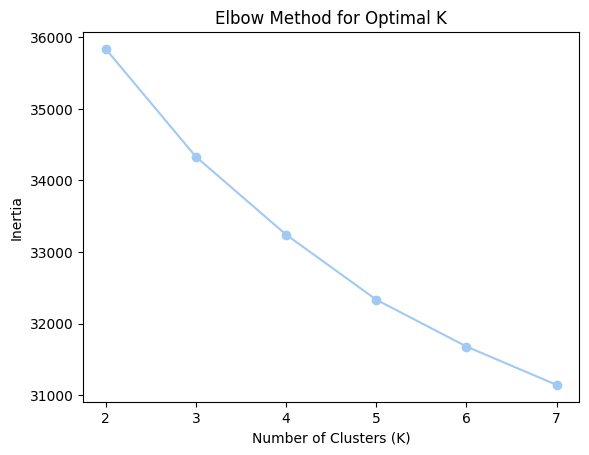

In [ ]:
inertias = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(2, 8), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

## Fit the Model of K-means

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Use PCA to Visualize
PCA is a famous dimension reduction technique, as our dataset have 40 columns right now, It's impossible to visualize them without reducing the dimensions, Thus, We are reducting the dimensions to 2 in order to visualize.


<ipython-input-19-923d20dba594>:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(x="pca_one", y="pca_two", hue='cluster', data=df_encoded, palette=current_palette, legend="full")


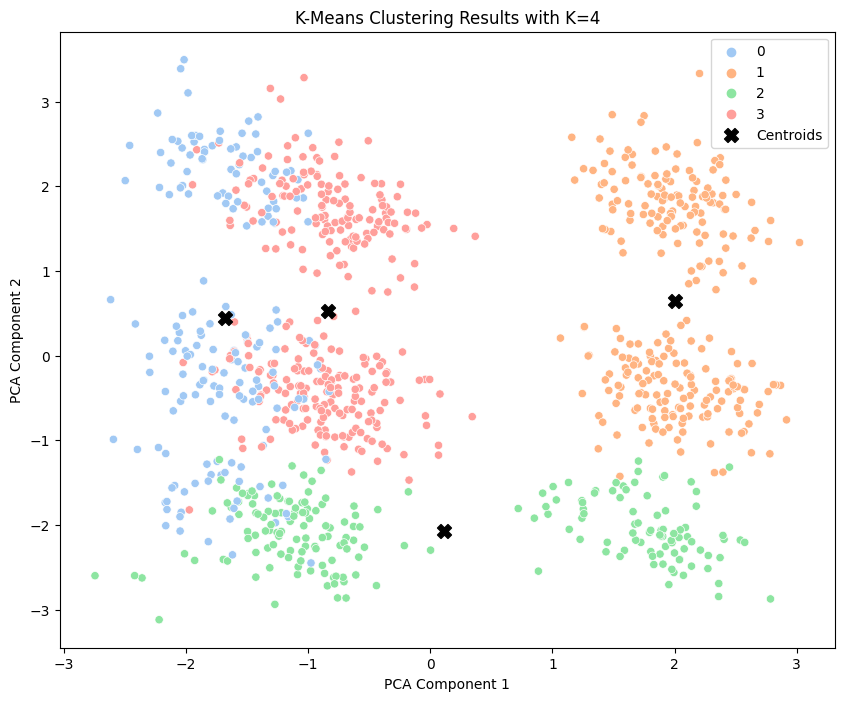

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Add the reduced dimensions to your dataframe
df_encoded['pca_one'] = reduced_data[:, 0]
df_encoded['pca_two'] = reduced_data[:, 1]

# Obtain the centroids from the kmeans object and transform them to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Now create a scatter plot with the two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x="pca_one", y="pca_two", hue='cluster', data=df_encoded, palette=current_palette, legend="full")

# Plot the centroids in PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering Results with K=4')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()

# K-means++ Clustering
The random state is set to 20. When you set random_state to an integer, it ensures that the random numbers are generated in the same order each time the code is run. This means that every time you run the algorithm with the same random_state, you will get the same results.

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=20)
df_encoded['cluster++'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## PCA Dimension Reduction to visualize

<ipython-input-20-01642a745871>:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=df_encoded, palette=current_palette, legend="full")


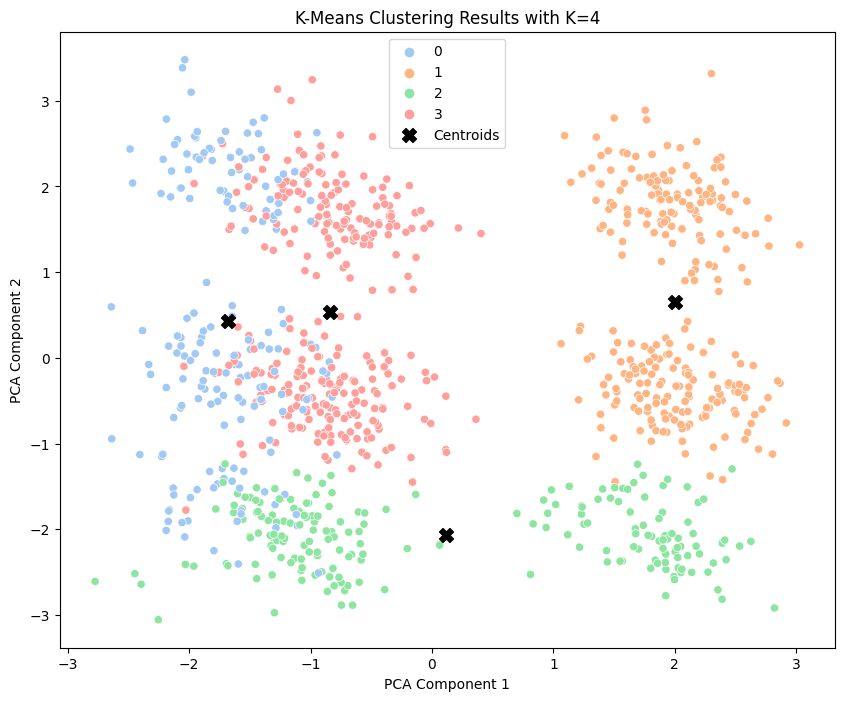

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

df_encoded['pca_one'] = reduced_data[:, 0]
df_encoded['pca_two'] = reduced_data[:, 1]

centroids_pca = pca.transform(kmeans.cluster_centers_)

#Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=df_encoded, palette=current_palette, legend="full")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering Results with K={}'.format(optimal_k))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Difference between both algorithms & why they both show almost same results?
K-means and K-means++ are both iterative algorithms used for clustering. The primary difference between them lies in the initialization of the centroids:

- K-means randomly selects initial centroids from the data points, which could lead to poor performance or slow convergence if the initial centroids are not well chosen.

- K-means++ is designed to overcome this potential pitfall by using a smarter initialization technique that tends to spread out the initial centroids. This is achieved by selecting the first centroid randomly, and then the subsequent centroids are chosen from the remaining data points with probability proportional to the square of the distance from the nearest existing centroid. This generally leads to a better starting point for the algorithm.

Despite the differences in initialization, both algorithms proceed with the same iterative process after the initial centroids are chosen. They alternate between assigning points to the nearest centroid and recalculating the centroids based on the assignments.

The reason K-means and K-means++ often end up at similar centroids is due to the nature of the optimization problem they are solving. They both aim to minimize the same objective function, which is the sum of squared distances between data points and their nearest centroid. If the data has clear, well-separated clusters, both methods are likely to converge to similar solutions, regardless of the initial centroids, because there may be a strong natural clustering structure in the data that dominates the results.

However, K-means++ tends to provide better and more consistent results because its initialization method reduces the likelihood of falling into local minima, which can be a problem with plain K-means, especially when the initial random centroids are poorly chosen.

# DBSCAN

After Manually trying multiple values for **eps** and **min_samples**, We found this combination with minimum noise.

In [ ]:
dbscan = DBSCAN(eps=10, min_samples=2)
df_encoded['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

## PCA dimension Reduction to visualize

<ipython-input-21-e10b1505bb35>:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(x='pca_one', y='pca_two', hue='dbscan_cluster', data=df_encoded, palette=current_palette, legend="full")


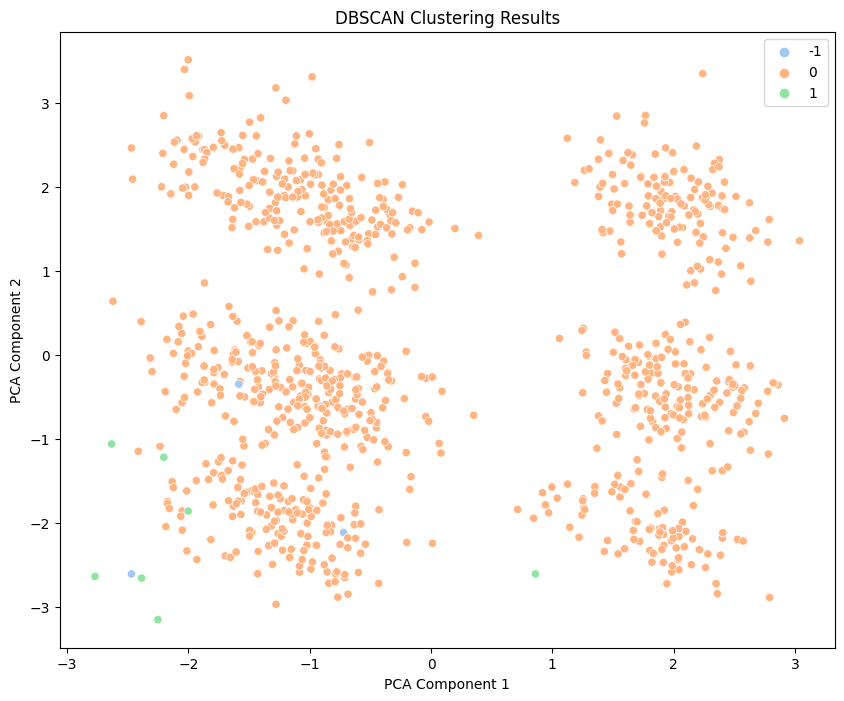

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df_encoded['pca_one'] = reduced_data[:, 0]
df_encoded['pca_two'] = reduced_data[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='dbscan_cluster', data=df_encoded, palette=current_palette, legend="full")
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()